<a href="https://colab.research.google.com/github/Murugan03/Task_06/blob/main/Assignment_6%2C7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Assignment 6**

In [371]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [372]:
data = pd.read_fwf('brain_body.txt')
data.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [373]:
data.isnull().sum() # checking is there any null value in the data.

Brain    0
Body     0
dtype: int64

In [374]:
data.dtypes # checking data types of each column

Brain    float64
Body     float64
dtype: object

In [375]:
data = data.drop_duplicates() # dropping duplicate values if any.
data.shape

(62, 2)

In [376]:
data.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [377]:
# outlier detection
iqr = data.Body.quantile(0.75) - data.Body.quantile(0.25)
upper_threshold = data.Body.quantile(0.75) + (1.5 * iqr)
lower_threshold = data.Body.quantile(0.25) - (1.5 * iqr)

In [378]:
upper_threshold, lower_threshold

(408.625, -238.375)

In [379]:
data.Body = data.Body.clip(-238.375, 408.625) # clipping the outliers.

In [380]:
iqr = data.Brain.quantile(0.75) - data.Brain.quantile(0.25)
upper_threshold = data.Brain.quantile(0.75) + (1.5 * iqr)
lower_threshold = data.Brain.quantile(0.25) - (1.5 * iqr)

In [381]:
upper_threshold, lower_threshold

(119.60625, -70.80375000000001)

In [382]:
data.Brain = data.Brain.clip(119.60, -70.80) # clipping the outliers.

In [383]:
data.describe()

,Brain,Body
count,62.000000,62.000000
mean,29.175468,104.676532
std,45.211792,148.635231
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,119.600000,408.625000


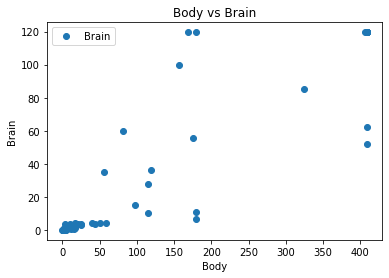

In [384]:
# plotting the feature vs target and finding the relation between them
data.plot(x='Body', y='Brain', style='o')
plt.title('Body vs Brain')
plt.xlabel('Body')
plt.ylabel('Brain')
plt.show()

In [385]:
data.corr()

,Brain,Body
Brain,1.000000,0.888241
Body,0.888241,1.000000


there is a linear relation between feature and target so we can fit linear regression alogorithm.

In [386]:
# splitting the data 
X = data.loc[:, ['Body']].values 
y = data.loc[:, 'Brain'].values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [387]:
X_train.shape, X_test.shape

((43, 1), (19, 1))

In [388]:
# scalling the data
scaler = StandardScaler() #initialize the scaler
scaler.fit(X_train) 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

# Model

In [389]:
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression()
regressor.fit(X_train, y_train) # y =  m * x + c

LinearRegression()

In [390]:
y_pred = regressor.predict(X_test)
y_pred

array([  4.04120585, 113.78396503,   2.41119193,   1.00219685,
         5.58833771, 113.78396503, 113.78396503,   1.41660717,
         2.27305516,   1.72050807,  50.48278888,   4.28985204,
        49.23955792,  47.58191665, 113.78396503, 113.78396503,
         4.34510675,   3.87544172,  32.66314518])

In [391]:
df = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred}) # comparing Actual target with the predicted target.
df

,Actual,Predicted
0,1.620,4.041206
1,52.160,113.783965
2,1.040,2.411192
3,0.023,1.002197
4,4.050,5.588338
5,119.600,113.783965
6,119.600,113.783965
7,0.280,1.416607
8,0.200,2.273055
9,0.122,1.720508


# R2 Score

In [392]:
from sklearn import metrics # metrics will contain all the evaluation metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))
regressor.score(X_test, y_test) # another way to find r2 value.

R2- SCORE: 0.7680394305145625


0.7680394305145625

since 0.58 is lesser than 0.8, so it's not consider as strong correlation.

## **Assignment 7**

In [393]:
data = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [394]:
data.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [395]:
data.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [396]:
data =  data.drop_duplicates()

In [397]:
data.dtypes

Sex       int64
Rank      int64
Year      int64
Degree    int64
YSdeg     int64
Salary    int64
dtype: object

In [398]:
data.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [399]:
# outlier detection
iqr = data['Year'].quantile(0.75) - data['Year'].quantile(0.25)
upper_threshold = data['Year'].quantile(0.75) + (1.5 * iqr)
lower_threshold = data['Year'].quantile(0.25) - (1.5 * iqr)

In [400]:
upper_threshold, lower_threshold

(23.0, -9.0)

In [401]:
data["Year"] = data["Year"].clip(23.0, -9.0)

In [402]:
iqr = data['YSdeg'].quantile(0.75) - data['YSdeg'].quantile(0.25)
upper_threshold = data['YSdeg'].quantile(0.75) + (1.5 * iqr)
lower_threshold = data['YSdeg'].quantile(0.25) - (1.5 * iqr)

In [403]:
upper_threshold, lower_threshold

(48.0, -18.0)

In [404]:
iqr = data['Salary'].quantile(0.75) - data['Salary'].quantile(0.25)
upper_threshold = data['Salary'].quantile(0.75) + (1.5 * iqr)
lower_threshold = data['Salary'].quantile(0.25) - (1.5 * iqr)

In [405]:
upper_threshold, lower_threshold

(40776.125, 4729.125)

In [406]:
data.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.442308,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.388490,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,23.000000,1.000000,35.000000,38045.000000


# EDA

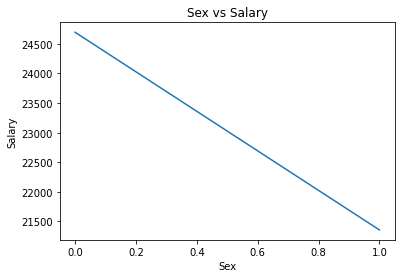

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


In [407]:
# plotting Sex vs Salary
data.groupby('Sex')['Salary'].mean().plot()
#data.plot.hist(x='Sex', y='Salary', rwidth = 0.8)
plt.title('Sex vs Salary')
plt.xlabel('Sex')
plt.ylabel('Salary')
plt.show()
data[['Sex', 'Salary']].corr()


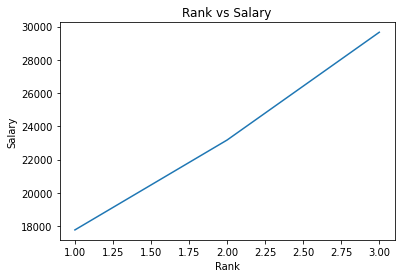

,Rank,Salary
Rank,1.000000,0.867488
Salary,0.867488,1.000000


In [408]:
# Rank vs Salary
data.groupby('Rank')['Salary'].mean().plot()
#df.plot(x='Rank', y='Salary', style='o')
plt.title('Rank vs Salary')
plt.xlabel('Rank')
plt.ylabel('Salary')
plt.show()
data[['Rank', 'Salary']].corr()


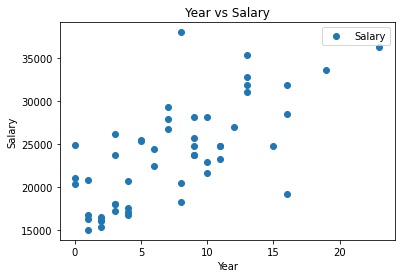

,Year,Salary
Year,1.000000,0.700711
Salary,0.700711,1.000000


In [409]:
# Year vs Salary
data.plot(x='Year', y='Salary', style='o')
plt.title('Year vs Salary')
plt.xlabel('Year')
plt.ylabel('Salary')
plt.show()
data[['Year', 'Salary']].corr()


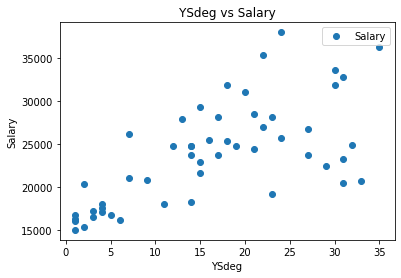

,YSdeg,Salary
YSdeg,1.000000,0.674854
Salary,0.674854,1.000000


In [410]:
# YSdeg vs Salary
data.plot(x='YSdeg', y='Salary', style='o')
plt.title('YSdeg vs Salary')
plt.xlabel('YSdeg')
plt.ylabel('Salary')
plt.show()
data[['YSdeg', 'Salary']].corr()


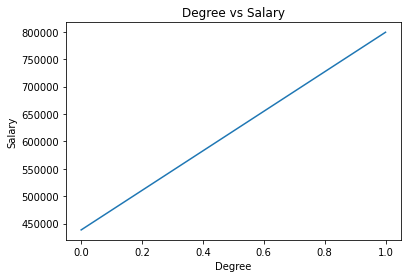

,Degree,Salary
Degree,1.000000,-0.069726
Salary,-0.069726,1.000000


In [411]:
# Degree vs Salary
data.groupby('Degree')['Salary'].sum().plot()
#data.plot(x='Degree', y='Salary', style='o')
plt.title('Degree vs Salary')
plt.xlabel('Degree')
plt.ylabel('Salary')
plt.show()
data[['Degree', 'Salary']].corr()


# Preparing the data

In [412]:
# splitting the data
X = data[['Sex', 'Year', 'Rank', 'Degree', 'YSdeg']].values
y = data['Salary'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [413]:
# scalling the data
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test) # transform the test data 

# Model

In [414]:
# Fiiting the model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [415]:
y_pred = regressor.predict(X_test_scaled) # predict the target variable using test data

In [416]:
df1 = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred}) # comparing Actual and predicted target.
df1

,Actual,Predicted
0,17095,16749.856449
1,19175,21066.215764
2,20525,22079.024954
3,25400,27032.646290
4,26775,28990.531391
5,15350,17954.023631
6,35350,30406.126548
7,23712,22967.221091
8,25500,29183.852670
9,18304,19551.111614


# R2 value

In [417]:

regressor.score(X_test_scaled, y_test)

0.7706035250186158

In [418]:
for column in data :
  X = data[[column]].values
  y = data['Salary'].values
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 
  scaler.fit(X_train) 
  X_train_scaled = scaler.transform(X_train) 
  X_test_scaled = scaler.transform(X_test) # transform the test data 
  regressor = LinearRegression()
  regressor.fit(X_train_scaled, y_train)
  y_pred = regressor.predict(X_test_scaled) # predict the target variable using test data
  print( column, " " , "R2_Value :", regressor.score(X_test_scaled, y_test)) 

Sex   R2_Value : 0.030052665440493564
Rank   R2_Value : 0.7674157918824187
Year   R2_Value : 0.47739734536109224
Degree   R2_Value : -0.4263853885488016
YSdeg   R2_Value : 0.44397538829389327
Salary   R2_Value : 1.0


Here the feature Sex has Very low R2 value with target varible. so Sex is not the factor in Salary.